In [19]:
import os
import subprocess
import shlex

from functions import *

%matplotlib inline
from matplotlib import pyplot as plt

# configurations for dirname
image_base_dir = "images"
model_base_dir = "models"
result_base_dir = "results"

def check_model_exist():
    if not os.path.isdir(model_base_dir):
        return False
    if os.listdir(model_base_dir) == ['inceptionv3_ich_sigmoid_U255_nch2', 'inceptionv3_stone_sigmoid_U255_nch2']:
        return True
    return False

def check_image_exist():
    if not os.path.isdir(image_base_dir):
        return False
    if os.listdir(image_base_dir) == ['inceptionv3_ich_sigmoid_U255_nch2', 'inceptionv3_stone_sigmoid_U255_nch2']:
        return True
    return False


In [20]:
#-----------------------------------------------------------
# Load sample images
#-----------------------------------------------------------
if not check_image_exist():
    print("Downloading sample images...")
    subprocess.call(shlex.split("bash download_images.sh"))

#-----------------------------------------------------------
# Load trained model
#-----------------------------------------------------------
if not check_model_exist():
    print("Downloading trained models")
    subprocess.call(shlex.split("bash download_models.sh"))


In [21]:

#-----------------------------------------------------------
# Set up configurations
#-----------------------------------------------------------
task = "ich"
labels = ["ich-negative", "ich-positive"]
model_name = "inceptionv3_ich_sigmoid_U255_nch2"

# task = "stone"
# labels = ["stone-negative", "stone-positive"]
# model_name = "inceptionv3_stone_sigmoid_U255_nch2"

# window function configurations
window_func = "sigmoid"
window_upbound = 255
window_nch = 2

## GPU usage
list_gpus = [0]

## Dir setting
image_dir = "{}/{}".format(image_base_dir, task)
model_dir = "{}/{}".format(model_base_dir, model_name)

# set gpu
set_gpu_config(list_gpus)
num_labels = len(labels)

# make result dir
result_dir = "{}/{}".format(result_base_dir, model_name)
if not os.path.exists(result_dir):
    command = "sudo mkdir -p {}".format(result_dir)
    print(command)
    subprocess.call(shlex.split(command))
    
    command = "sudo chmod 664 {}".format(result_dir)
    print(command)
    subprocess.call(shlex.split(command))


sudo mkdir -p results/inceptionv3_ich_sigmoid_U255_nch2
sudo chmod 664 results/inceptionv3_ich_sigmoid_U255_nch2


original HU value (without windowing)


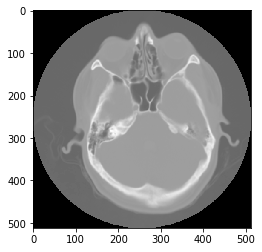

CH0


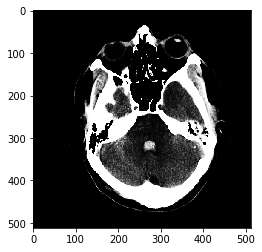

CH1


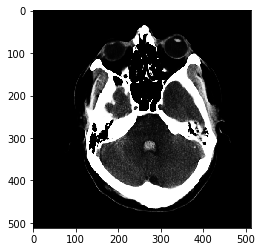

[CASE000839__S6__I0030] prediction : ich-positive
original HU value (without windowing)


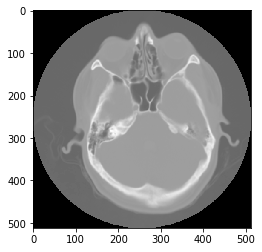

CH0


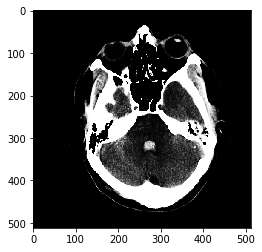

CH1


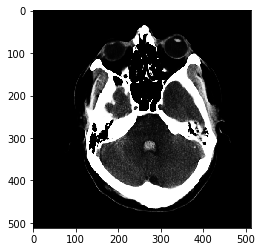

[CASE000826__S3__I0009] prediction : ich-positive
original HU value (without windowing)


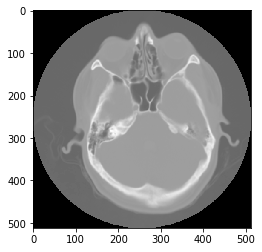

CH0


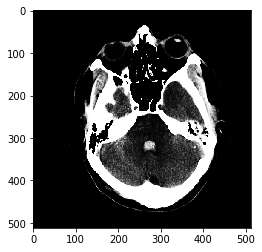

CH1


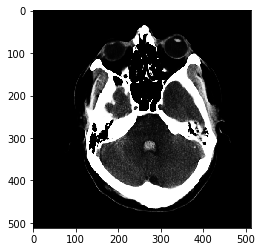

[CASE000856__S2__I0013] prediction : ich-positive
original HU value (without windowing)


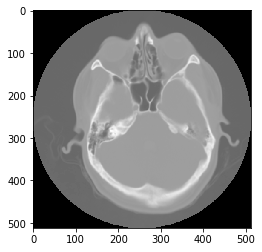

CH0


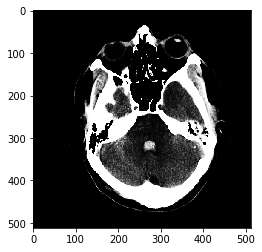

CH1


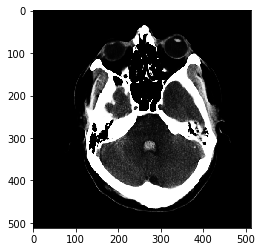

[CASE000834__S2__I0016] prediction : ich-positive
original HU value (without windowing)


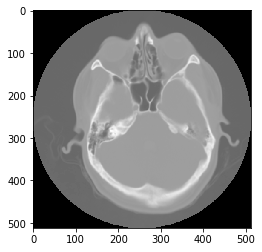

CH0


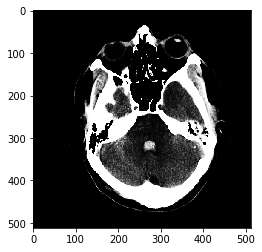

CH1


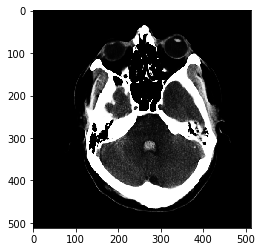

[CASE000846__S2__I0018] prediction : ich-positive


In [22]:

#-----------------------------------------------------------
# Load model and weights
#-----------------------------------------------------------
model_json_file = "{}/model.json".format(model_dir)
model_weights_file = "{}/weights.h5".format(model_dir)
model = load_model(model_json_file, model_weights_file, window_func, window_upbound)

#----------------------------------------------
# Test
#----------------------------------------------
model_func = define_model_func(model)

image_idx = 0
batches = 0
dict_results = {"gt":[], "pred":[], "prob":[]}
# shape: batch_test_images = (1,512,512,1), batch_test_labels = (1,1)

for image_file in os.listdir(image_dir):
    if image_file.startswith("."):
        continue
    image_name = image_file.split(".")[0]
    image_file_path = "{}/{}".format(image_dir, image_file)
    # load image
    ori_image = np.load(image_file_path)
    test_image = ori_image[np.newaxis,:,:,np.newaxis]

    # deploy model
    prob, windowed_maps = model_func([test_image, 0])
    prob = prob[0,0]
    pred = 1 if prob>=0.5 else 0

    # save original image
    img_file_name = "{}.png".format(image_name)
    img_file_path = os.path.join(result_dir, img_file_name)
    save_image(img_file_path, ori_image, hist_equal=True)
    print("original HU value (without windowing)")
    plt.imshow(ori_image, cmap='gray')
    plt.show()
    # save windowed images
    for ch_idx in range(window_nch):
        window_image = windowed_maps[0,:,:,ch_idx]
        result_file_path = "{}/{}_window_ch{}.png".format(result_dir, image_name, ch_idx+1)
        save_image(result_file_path, window_image, hist_equal=True)
        print("CH{}".format(ch_idx))
        plt.imshow(window_image, cmap='gray')
        plt.show()
    
        

    print("[{}] prediction : {}".format(image_name, labels[pred]))